In [77]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
# import yfinance as yf
plt.style.use('fivethirtyeight')


# 1, Load data 

In [78]:
# Import data
df = pd.read_excel('D:/Desktop/Data Analyst/Stock Project Data Science/Data/FiinTrade_Giá_HPG_20231003 - Model.xlsx')  

# Show data
df

,Date,Close,THAY ĐỔI,%THAY ĐỔI,MỞ,CAO,THẤP,GIÁ TB,KL KHỚP,GT KHỚP,KL THỎA THUẬN,GT THỎA THUẬN,TỔNG KHỐI LƯỢNG,TỔNG GIÁ TRỊ,Unnamed: 14
0,2007-11-15,2641.884287,127000,0.000000,2662.686493,2704.291003,2267.443995,125542.550504,1306330,164000000000,0,0,1306330,164000000000,NaN
1,2007-11-16,2517.070779,-6000,-0.047300,2517.070826,2517.070779,2517.070779,121001.166955,248510,30070000000,0,0,248510,30070000000,NaN
2,2007-11-19,2392.257402,-6000,-0.049600,2392.257396,2392.257402,2392.257402,114998.339973,120480,13855000000,0,0,120480,13855000000,NaN
3,2007-11-20,2288.246210,-5000,-0.043500,2288.246205,2288.246210,2288.246210,109998.296713,58710,6458000000,50000,5500000000,108710,11958000000,NaN
4,2007-11-21,2371.455085,4000,0.036300,2184.235014,2371.455085,2184.234946,107721.678936,728080,78430000000,0,0,728080,78430000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,2023-09-26,26200.000000,200,0.007692,25850.000000,26800.000000,25850.000000,26351.757989,30849974,812951048800,195000,5421000000,31044974,818372048800,NaN
3954,2023-09-27,26500.000000,300,0.011450,26150.000000,26700.000000,26150.000000,26397.019537,20332879,536727404200,1961801,51596184400,22294680,588323588600,NaN
3955,2023-09-28,26600.000000,100,0.003774,26600.000000,26850.000000,26200.000000,26559.160574,16571772,440132353550,900000,23640000000,17471772,463772353550,NaN
3956,2023-09-29,26300.000000,-300,-0.011278,26800.000000,26850.000000,26250.000000,26450.328262,15025050,397417504650,1223000,32348350000,16248050,429765854650,NaN


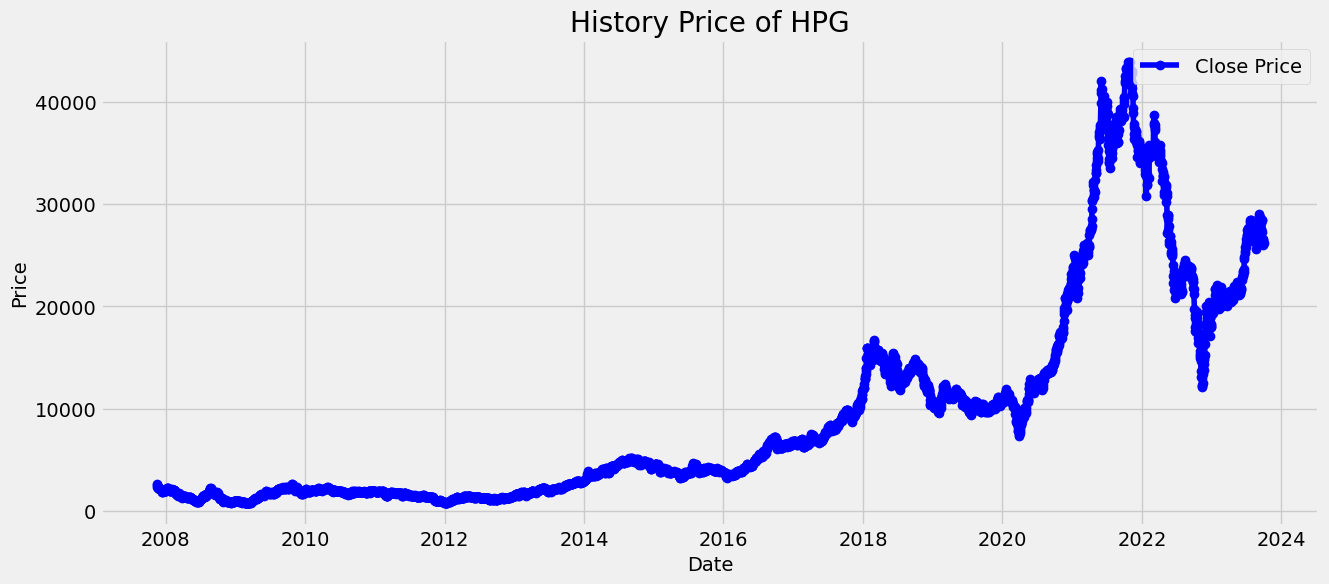

In [97]:



# Đảm bảo cột 'Date' có định dạng datetime
df['Date'] = pd.to_datetime(df['Date'])

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], marker='o', linestyle='-', color='b', label='Close Price')

plt.gcf().set_size_inches(14, 6)

plt.title('History Price of HPG', fontsize=20)
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# 2, Prepare data to train

In [80]:
#create a new dataframe with only the 'Close' column
data = df.filter(['Close'])

#convert the dataframe to a numpy array
dataset = data.values

#get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8) # Train 80% of the data 

training_data_len

3167

In [81]:
## Scale the data
scaler = MinMaxScaler(feature_range=(0,1)) # Range of values data only between 0 and 1
scaled_data = scaler.fit_transform(dataset) # method to scale the data 

# Example: [10, 20, 30, 35, 40, 90]
# After scaling with:
# scaler = MinMaxScaler(feature_range=(0, 1))
# scaled_data = scaler.fit_transform(data) ?
# => Output :  [0  0.11111111  0.22222222  0.27777778  0.33333333  1 ]


scaled_data 

array([[0.04379508],
       [0.04090198],
       [0.0380089 ],
       ...,
       [0.59912771],
       [0.59217392],
       [0.58985599]])

In [82]:
## create the training dataset

#Create the scaled training data set based on the scaled data in the previous step
train_data = scaled_data[0:training_data_len  , : ] 
# '0:training_data_len'  means that the ROWS from the beginning to the training_data_len are selected
#  ':'  means that ALL COLUMNS are selected.

#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0]) # 60 previous i row values in the column index = 0 - column 0 is first column
    y_train.append(train_data[i,0]) # 61st value of the column 0 
    if i<= 61:# print the first 61 values 
        print(x_train)
        print(y_train)
        print()


[array([0.04379508, 0.04090198, 0.0380089 , 0.03559799, 0.03752671,
       0.03752671, 0.03559799, 0.03511581, 0.03318708, 0.03415144,
       0.03415144, 0.03366926, 0.03366926, 0.03318708, 0.0327049 ,
       0.03318708, 0.03174053, 0.02957072, 0.0274009 , 0.02788308,
       0.02619545, 0.02643654, 0.02643654, 0.02765539, 0.02984931,
       0.02838669, 0.02838669, 0.02887423, 0.02838669, 0.02838669,
       0.02838669, 0.02887423, 0.029118  , 0.02936177, 0.02984931,
       0.03058062, 0.03277455, 0.03521224, 0.0347247 , 0.03423717,
       0.03423717, 0.03179947, 0.03374963, 0.03131193, 0.03228701,
       0.03131193, 0.02984931, 0.02765539, 0.02789916, 0.02789916,
       0.02814293, 0.029118  , 0.03131193, 0.03033685, 0.03179947,
       0.03131193, 0.02984931, 0.03009308, 0.02984931, 0.02789916])]
[0.027655386476405103]

[array([0.04379508, 0.04090198, 0.0380089 , 0.03559799, 0.03752671,
       0.03752671, 0.03559799, 0.03511581, 0.03318708, 0.03415144,
       0.03415144, 0.03366926, 0.0

### Note :Build model predicts price based on last 60 days so create training dataset into parts, each part contains 60 values


In [83]:
# Convert the x_train and y_train to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

In [84]:
# Reshape the data because LSTM model in 3 dimensions but numpy array in 2 dimensions
# Convert numpy array => 3 Dimensions array
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1)) 
#x_train.shape[0] = 4144 , x_train.shape[1] = 60 , 1 is the number of features ( only have 1 feature = 'Close')

x_train.shape

(3107, 60, 1)

# 3, Build and train the model

## Task a : Build the model

In [85]:
## Build the LSTM model

### What is LSTM?
# LSTM là một kiểu mạng nơ-ron hồi quy (RNN) đặc biệt, được thiết kế để học các phụ thuộc xa trong dữ liệu.
# Lớp LSTM là một loại lớp nơ ron neural network (RNN) thường được sử dụng cho các tác vụ xử lý chuỗi,
# chẳng hạn như dự đoán chuỗi thời gian, nhận dạng giọng nói và xử lý ngôn ngữ tự nhiên.
# Lớp LSTM có khả năng nắm bắt các phụ thuộc lâu dài trong chuỗi đầu vào
# bằng cách cho phép thông tin được giữ lại hoặc bị lãng quên theo thời gian.
# Điều này đạt được thông qua việc sử dụng "TẾ BÀO BỘ NHỚ" và "CỔNG",
# kiểm soát luồng thông tin qua lớp.

# Example :
# model = Sequential()
# model.add(LSTM(64, input_shape=(10, 1))) # LSTM layer with 64 memory cells
# model.add(Dense(1, activation='sigmoid')) # Output layer with 1 neuron
# Explain:
# The LSTM layer is configured to have 64 MEMORY CELLS and an input shape of (10, 1), 
# which means it will take in a sequence of 10 time steps, each with 1 feature. 
# Finally, we add a dense OUTPUT layer with 1 neuron and a sigmoid activation function.


#  Create the model
model = Sequential()  
#the Sequential class is used to define a linear stack of layers that make up a deep learning model. 
#It is a wrapper for the neural network model that provides an easy-to-use interface for creating and managing models.

# Add the first LSTM layer 
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1))) 
# 50 neurons, return_sequences = True because we have more than one LSTM layer
# input_shape is the time step, x_train.shape[1] = 60 is the number of features, repeat 1 time

# Add the second LSTM layer
model.add(LSTM(50, return_sequences=False)) 
# 50 neurons, return_sequences = False because that layer returns only the last output in the output sequence

# Add the third, four layer 
model.add(Dense(25)) # 25 neurons
# Lớp dense nhận đầu vào từ lớp trước và áp dụng một phép biến đổi tuyến tính để tạo ra một tập hợp đầu ra mới.
# The dense layer receives input from the previous layer 
# and applies a linear transformation to produce a new set of outputs.

model.add(Dense(1)) # 1 neuron
# This adds a final dense layer with 1 neuron. 
# This is the output layer of the model, which produces a single continuous output value


In [86]:

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# compile() function is used to configure the learning process of a model
# It takes three main arguments: optimizer, loss, and metrics.

# optimizer is the optimization algorithm used during training
# 'adam' optimizer is a popular choice in deep learning 
# because it adapts the learning rate during training and works well for many problems.
# during training, the model will use the 'adam' algorithm to optimize the weights and biases

# loss argument is used to specify the loss function that the model will minimize during training. 
# The 'mean_squared_error' loss function is a common choice for regression problems, 
# the goal is to minimize the mean squared error between the predicted and actual values.


## Task b: Train the model

In [87]:
## Train the model
model.fit(x_train, y_train, batch_size=1, epochs=2)

# model.fit() is a method trains the neural network model with the specified input data (x_train) and target data (y_train). 
# The training process involves updating the weights and biases of the model based on the input data and the output produced by the model.
# x_train: The input data used for training the model.
# y_train: The target data used for training the model.
# batch_size: The number of samples processed before the model is updated
# example: Initially the data has 120 rows, 
# batch_size=3 => You will be tranning the first 40 rows, batch_size = 2 => 60 rows
# epochs: The number of times the model is trained on the entire dataset. 
# An epoch is considered complete when the model has processed all of the training data once.

Epoch 1/2
3107/3107 [==============================] - 130s 38ms/step - loss: 1.7655e-04
Epoch 2/2
3107/3107 [==============================] - 121s 39ms/step - loss: 8.2943e-05


In [88]:
# create the testing data set

# Create a new array containing scaled values from index 4144( the train data shape[0]) to 5254 ( end)
test_data = scaled_data[training_data_len - 60: , : ]
# 'training_data_len - 60 : '  means that the ROWS from the training_data_len - 60 to end are selected
#  ':'  means that ALL COLUMNS are selected.

# Create the data sets x_test and y_test
x_test = []
y_test =  dataset[training_data_len : , : ]

# Add value for x_test
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0]) 
    # 60 previous i row values in the column index = '0' - column 0 is first column


In [89]:
# convert the data to a numpy array
x_test = np.array(x_test)

In [90]:
# Reshape the numpy array to 3 dimensions
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
# 1 is the number of features ( only have 1 feature = 'Close')

In [91]:
# Get the models predicted price values

# Predict the values
predictions = model.predict(x_test) 
# predict function sử dụng để dự đoán đầu ra cho các mẫu đầu vào dựa trên mô hình đã được đào tạo.
# predict() function is used to predict the output for the input samples based on the trained model.

# Unscale the data
predictions = scaler.inverse_transform(predictions) 

25/25 [==============================] - 3s 24ms/step


# 4, Backtesting the model

In [92]:
## Checking the average deviation between the predicted values and the actual values

# Get the root mean squared error (RMSE)
# RMSE  is a measure of the average deviation between the predicted values and the actual values in a dataset. 
# It is a commonly used evaluation metric in regression analysis, machine learning and other predictive modeling tasks.
# Fomula: RMSE = sqrt(mean((y_pred - y_true)^2))
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2638.2960577815247

### The 2 way to reduce average deviation 
### Method 1: is to increase the trained data - is increase 'tranning_data_len' in part Prepare data
### Method 2: train the data many times - is increase 'epochs'  in  ' model.fit(x_train, y_train, batch_size=1, epochs=3)'
### But it has a certain limit - it's not that the more you run, the less deviation you get
### Method 1 is more effective in reducing deviation than method 2
## => WE NEED BIG DATA



C:\Users\Long\AppData\Local\Temp\ipykernel_15796\3062225484.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions'] = predictions


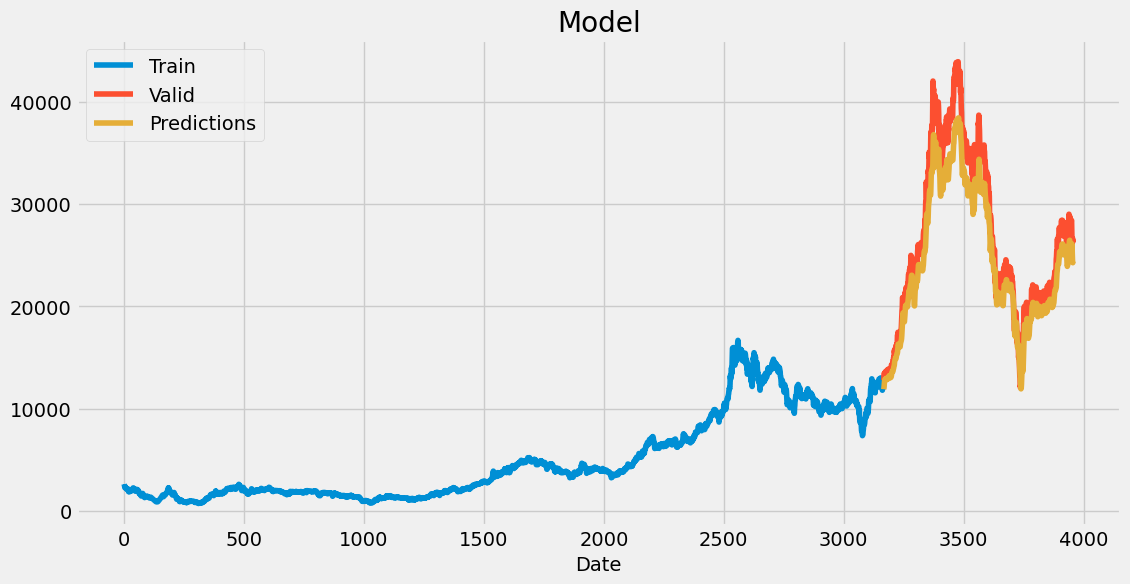

In [93]:
## Visualize the data

# Create the data for the graph
train_data = data[:training_data_len] # Trained data
valid_data = data[training_data_len:] # Valid_data use to valid the trained data
valid_data['Predictions'] = predictions

# Draw the line chart with X- axis is Date, Y- axis is Close Price of the train data 
plt.plot(train_data['Close'])

# Draw the line chart with X- axis is Date, Y- axis is Close Price and Predict Price of the Predict data 
plt.plot(valid_data[['Close', 'Predictions']])

# Set size for the chart
plt.gcf().set_size_inches(12, 6)

# Set title for the chart
plt.title('Model')
plt.xlabel('Date')
plt.legend(['Train', 'Valid', 'Predictions'], loc='upper left') 

plt.show()


In [94]:
# Show the valid and predicted prices
valid_data

,Close,Predictions
3167,12797.185280,11909.605469
3168,13409.224576,12112.165039
3169,13381.404608,12447.087891
3170,13464.864512,12683.440430
3171,13520.504448,12821.743164
...,...,...
3953,26200.000000,24934.437500
3954,26500.000000,24374.476562
3955,26600.000000,24260.587891
3956,26300.000000,24387.900391


# 5, Predict price for a specific day

In [98]:
## Example: Predict the price of MSFT on 2023-02-10

# Import data 
df_new = pd.read_excel('D:/Desktop/Data Analyst/Stock Project Data Science/Data/FiinTrade_Giá_HPG_20231003 - Model.xlsx')   
#create a new dataframe only with the 'Close' column
new_data = df_new.filter(['Close'])
# Get the last 60 day closing price values and convert the dataframe to an numpy array
last_60_days = new_data[-60:].values
# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
# Create an test list
X_test = []
# Add Close Price last 60 days to the test list
X_test.append(last_60_days_scaled)
# Convert the X_test dataset to a numpy array
X_test = np.array(X_test)
# Reshape the data => 3 dimensions array
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price) # Print the predicted price

1/1 [==============================] - 0s 47ms/step
[[24419.18]]


In [100]:
df_new['Date'] = pd.to_datetime(df_new['Date'], format='%m/%d/%Y')
print(df_new[df_new['Date'] == '10/2/2023']['Close'])


3957    26200.0
Name: Close, dtype: float64
